In [2]:
%matplotlib inline
import numpy as np
import matplotlib.tri as Tri
from netCDF4 import Dataset as NetCDFFile 
import netCDF4
from netCDF4 import num2date, date2num, date2index
import datetime as dt
import pandas as pd
from StringIO import StringIO
import xarray as xr
from scipy import stats
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
import seaborn as sns
from datetime import datetime
import math

/Users/bgh2-ra/anaconda2/lib/python2.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/Users/bgh2-ra/anaconda2/lib/python2.7/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


## Install File

In [3]:
nameCSV = 'melville_ACTUAL_FILEEE.csv'
df = pd.read_csv(str(nameCSV), sep=r'\s+', engine='c', header=0, na_filter=False, \
                               dtype=np.float, low_memory=False)

data = df.sort_values(by=['tt'])

lat = data.values[:,0]
lon = data.values[:,1]
wh = data.values[:,2]
tt = data.values[:,3]
qc = data.values[:,4]
back =data.values[:,5]
ws = data.values[:,6]
len(lat)

2998

## Calculate mean value of each satellite track 

In [4]:
days = [] #daystart
for k in range(len(tt)):
       
    t1 = netCDF4.num2date(tt[k],u'days since 1985-01-01 00:00:00 UTC')
    if k == 0: #get day 0. Then else: every day after that
        days.append(0)
        dd = netCDF4.num2date(tt[k],u'days since 1985-01-01 00:00:00 UTC')
        it = 0
    else:
        if t1.day != dd.day: #if day 1 is not equal to day 2, then append
            #print dd.day,t1.day
            days.append(k)
            it += 1
            dd = netCDF4.num2date(tt[k],u'days since 1985-01-01 00:00:00 UTC')
            
            
print 'Number of Satellite Tracks:', len(tt[days])

Number of Satellite Tracks: 2639


## Make ndarray(alltime) and list(days2) that has dates

In [5]:
alltime = num2date(tt[:],u'days since 1985-01-01 00:00:00 UTC')

In [6]:
r = netCDF4.num2date(tt[days],u'days since 1985-01-01 00:00:00 UTC')

In [7]:
r[2300:-1]

array([datetime.datetime(2016, 10, 28, 12, 25, 6),
       datetime.datetime(2016, 10, 30, 15, 58, 20, 421876),
       datetime.datetime(2016, 11, 1, 9, 17, 57, 748163),
       datetime.datetime(2016, 11, 3, 9, 15, 30, 941407),
       datetime.datetime(2016, 11, 6, 2, 56, 55, 826772),
       datetime.datetime(2016, 11, 8, 0, 10, 11),
       datetime.datetime(2016, 11, 9, 13, 56, 53, 887152),
       datetime.datetime(2016, 11, 15, 0, 1, 30, 271118),
       datetime.datetime(2016, 11, 19, 11, 55, 23, 606120),
       datetime.datetime(2016, 11, 20, 20, 21, 59, 62500),
       datetime.datetime(2016, 11, 22, 20, 19, 31, 830881),
       datetime.datetime(2016, 11, 24, 12, 25, 4),
       datetime.datetime(2016, 11, 28, 7, 55, 20, 412224),
       datetime.datetime(2016, 11, 29, 9, 53, 54, 629558),
       datetime.datetime(2016, 11, 30, 7, 52, 50, 178978),
       datetime.datetime(2016, 12, 2, 7, 50, 26, 132812),
       datetime.datetime(2016, 12, 5, 0, 10, 9),
       datetime.datetime(2016, 12,

In [8]:
# use this to make year/month df

def getMeanH(month,year):
    valwh = []
    for k in range(len(days)):
        if r[k].year == year and r[k].month == month:
            valwh.append(wh[days[k]])

    return np.mean(valwh)


monthYear = []
for k in range(1,13):
    monthYear.append(getMeanH(k,2019))

print monthYear,
#     print alltime[k].year #,wh[days[k]]

[1.8169033494924136, 1.7351434314167584, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]


/Users/bgh2-ra/anaconda2/lib/python2.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/bgh2-ra/anaconda2/lib/python2.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [9]:
monthYear

[1.8169033494924136,
 1.7351434314167584,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan]

In [10]:
days2 = [] #daystart
for k in range(len(alltime)):
       
    t1 = alltime[k]
    if k == 0: #get day 0. Then else: every day after that
        days2.append(alltime[k])
        dd =alltime[k]
        it = 0
    else:
        if t1.day != dd.day: #if day 1 is not equal to day 2, then append
            #print dd.day,t1.day
            days2.append(alltime[k])
            it += 1
            dd = alltime[k]
            
            
print 'Number of Satellite Tracks:', len(tt[days])

Number of Satellite Tracks: 2639


In [11]:
days2

[datetime.datetime(1985, 4, 5, 21, 27, 30, 469790),
 datetime.datetime(1985, 4, 14, 9, 26, 31, 513184),
 datetime.datetime(1985, 5, 7, 11, 6, 14, 88943),
 datetime.datetime(1985, 5, 30, 12, 45, 54, 566106),
 datetime.datetime(1985, 6, 2, 12, 54, 42, 804684),
 datetime.datetime(1985, 6, 25, 14, 34, 14, 719868),
 datetime.datetime(1985, 8, 10, 17, 53, 29, 313367),
 datetime.datetime(1985, 9, 2, 19, 32, 58, 781247),
 datetime.datetime(1985, 9, 5, 19, 41, 45, 54690),
 datetime.datetime(1985, 9, 28, 21, 21, 12, 227023),
 datetime.datetime(1985, 10, 16, 11, 10, 26, 379465),
 datetime.datetime(1985, 11, 8, 12, 49, 40, 654948),
 datetime.datetime(1985, 11, 14, 0, 39, 52, 969910),
 datetime.datetime(1985, 12, 7, 2, 18, 58, 426560),
 datetime.datetime(1986, 1, 19, 17, 56, 10, 249999),
 datetime.datetime(1986, 2, 11, 19, 35, 15, 709374),
 datetime.datetime(1986, 3, 12, 9, 3, 50, 362630),
 datetime.datetime(1986, 4, 4, 10, 42, 45, 532226),
 datetime.datetime(1986, 4, 7, 10, 51, 29, 847656),
 datet

## WAVE PERIOD EQN

$ \epsilon = 3.25 \left( H_s^2 g^2/U^4 \right)^{0.31}$



In [12]:
def waveage(H, U, grav=9.80665):
    '''
    The pseudo wave age can be expressed in terms of significant wave height and surface wind speed.
    '''

    grav2 = grav**2
    hs2 = np.square(H) 
    u4 = np.power(U,4)
    tmp = np.divide(hs2*grav2,u4)
    eps = 3.25*np.power(tmp,0.31)
    
    return eps


def waveperiod(H, U, grav=9.80665):
    '''
    Wave age from GA-2, Govindan et al.
    '''

    eps = waveage(H, U, grav=9.80665)
    period = (((eps-(5.78))/(eps+(U/(H*((U/H)+H)))))+(H+(5.70)))
    
    return period

In [13]:
T = waveperiod(wh,ws)
print T
print len(T),len(wh)

[5.1940376  5.56986478 5.31512902 ... 5.57214165 4.4818197  5.22972275]
2998 2998


In [14]:
dayswh = wh[days] #wave height for each satellite pass
daysTz = T[days]

print len(dayswh)
print len(daysTz)

2639
2639


In [15]:
dayswh

array([1.36339998, 1.351125  , 1.34530771, ..., 2.64020023, 1.34984618,
       0.8967273 ])

In [16]:
days_meanwh = np.mean(wh[days])
print days_meanwh

1.6590393571608488


## Calculate Wave Power



### Total Wave Energy
$E = \frac{1}{8} \left(pgH_s^2\right) $


In [17]:
def totalwaveenergy(H):
    
    '''
    The total wave energy can be calculated using Hs, gravity and water density
    '''
    
    x = 1./8.
    p = 1025. #sea water density, kg/m^3
    g = 9.80665
    h2 = np.square(H) 
    
    pgh = p*g*h2
    
    e = x*pgh
    
    return e

In [18]:
we = totalwaveenergy(wh)

In [19]:
we

array([2335.61428134, 2293.74753514, 2274.03850912, ..., 8758.47075594,
       2289.40758556, 1010.35812679])

### Wave energy speed / Wave Velocity
$Cg = \frac{gTz}{2\pi}n$


In [20]:
def wavespeed(T):
    '''
    Wave group speed
    '''
    
    g =9.80665
    ts = T #wave period
    pi = 2*math.pi
    n=0.5
    
    top = g*ts
    
    Cg = n *(np.divide(top,pi))
    
    return Cg
    

In [21]:
Cg = wavespeed(T)
Cg

array([4.05336675, 4.34665793, 4.14786509, ..., 4.34843477, 3.49756016,
       4.08121503])

### Wave Energy Flux
$P = ECg$

In [22]:
def waveenergyflux(H,T):
    '''
    The rate at which energy is carried by waves, determined using total wave energy and wave energy speed
    '''
    
    e = totalwaveenergy(H)
    Cg = wavespeed(T)
    y = 0.001
    P = e * Cg*y
    
    return P
    
    

In [23]:
power1 = waveenergyflux(wh,T)
power1

array([ 9.46710128,  9.97013591,  9.43240495, ..., 38.08563878,
        8.00734075,  4.12348877])

In [24]:
pp = power1[days]

In [25]:
print pp.shape, power1.shape, 'therefore use pp in df'

(2639,) (2998,) therefore use pp in df


In [26]:
print dayswh.shape
print daysTz.shape

(2639,)
(2639,)


In [27]:
df = pd.DataFrame(data={"date": days2, "wh":dayswh, "period":daysTz, "power":pp})
df.to_csv("./melville_timeseries.csv", sep=',',index=False)
df

,date,period,power,wh
0,1985-04-05 21:27:30.469790,5.194038,9.467101,1.363400
1,1985-04-14 09:26:31.513184,5.569865,9.970136,1.351125
2,1985-05-07 11:06:14.088943,5.315129,9.432405,1.345308
3,1985-05-30 12:45:54.566106,6.179491,25.035795,2.032692
4,1985-06-02 12:54:42.804684,5.682883,14.732457,1.626000
5,1985-06-25 14:34:14.719868,4.322023,3.608728,0.922786
6,1985-08-10 17:53:29.313367,5.121676,9.093948,1.345667
7,1985-09-02 19:32:58.781247,5.294743,27.787485,2.313500
8,1985-09-05 19:41:45.054690,5.488118,31.029988,2.401300
9,1985-09-28 21:21:12.227023,4.629636,8.159797,1.340706


In [28]:
df[400:500]

,date,period,power,wh
400,1997-02-23 19:45:31.252841,5.622357,18.751416,1.844273
401,1997-02-27 00:41:12.031652,4.862903,7.887913,1.286176
402,1997-03-01 05:50:09.314670,4.902407,10.573583,1.483111
403,1997-03-06 21:36:27.590960,6.071151,48.145093,2.843857
404,1997-03-17 15:37:57.909385,6.450649,41.691282,2.567369
405,1997-03-25 13:41:05.400000,6.185229,1.425431,0.484800
406,1997-03-28 12:56:41.212776,4.611314,7.245640,1.265882
407,1997-03-30 23:45:44.125000,5.375077,20.569731,1.975556
408,1997-04-03 00:41:12.305061,5.193818,15.380253,1.737824
409,1997-04-04 11:39:38.141335,4.905660,10.947929,1.508636


In [29]:
print len(df.wh)
print len(df.date)
print len(df.power)

2639
2639
2639


## Get rolling average wh based on 30 Days

In [30]:
yrolling = df.rolling('30D', on = 'date', min_periods = 1).mean()

In [31]:
yrolling

,date,period,power,wh
0,1985-04-05 21:27:30.469790,5.194038,9.467101,1.363400
1,1985-04-14 09:26:31.513184,5.381951,9.718619,1.357262
2,1985-05-07 11:06:14.088943,5.442497,9.701270,1.348216
3,1985-05-30 12:45:54.566106,5.747310,17.234100,1.689000
4,1985-06-02 12:54:42.804684,5.725834,16.400219,1.668000
5,1985-06-25 14:34:14.719868,5.394799,14.458993,1.527159
6,1985-08-10 17:53:29.313367,5.121676,9.093948,1.345667
7,1985-09-02 19:32:58.781247,5.208209,18.440717,1.829583
8,1985-09-05 19:41:45.054690,5.301512,22.637140,2.020156
9,1985-09-28 21:21:12.227023,5.137499,22.325756,2.018502


In [32]:
wh_rolling=yrolling['wh']

period_rolling=yrolling['period']

power_rolling = yrolling['power']

## Incorporate rolling average wh into dataframe

In [33]:
df = pd.DataFrame(data={"date": days2, "wh":dayswh, "wh_rolling":wh_rolling, "period":daysTz, "period_rolling":period_rolling, "power":pp, "power_rolling":power_rolling })
df.to_csv("./melville_timeseries.csv", sep=',',index=False)
df

,date,period,period_rolling,power,power_rolling,wh,wh_rolling
0,1985-04-05 21:27:30.469790,5.194038,5.194038,9.467101,9.467101,1.363400,1.363400
1,1985-04-14 09:26:31.513184,5.569865,5.381951,9.970136,9.718619,1.351125,1.357262
2,1985-05-07 11:06:14.088943,5.315129,5.442497,9.432405,9.701270,1.345308,1.348216
3,1985-05-30 12:45:54.566106,6.179491,5.747310,25.035795,17.234100,2.032692,1.689000
4,1985-06-02 12:54:42.804684,5.682883,5.725834,14.732457,16.400219,1.626000,1.668000
5,1985-06-25 14:34:14.719868,4.322023,5.394799,3.608728,14.458993,0.922786,1.527159
6,1985-08-10 17:53:29.313367,5.121676,5.121676,9.093948,9.093948,1.345667,1.345667
7,1985-09-02 19:32:58.781247,5.294743,5.208209,27.787485,18.440717,2.313500,1.829583
8,1985-09-05 19:41:45.054690,5.488118,5.301512,31.029988,22.637140,2.401300,2.020156
9,1985-09-28 21:21:12.227023,4.629636,5.137499,8.159797,22.325756,1.340706,2.018502



## Split into two, either side of date gap

In [34]:
print df.date[60]
print df.date[59]

1992-10-16 19:47:40.636160
1988-08-01 11:42:15.423958


In [35]:
#Period normal    
time1 = df.period[0:59]
time2 = df.period[60:-1]

#Period rolling
tt1 = df.period_rolling[0:59]
tt2 = df.period_rolling[60:-1]
        


#Hs normal
y1 = df.wh[0:59]
y2 = df.wh[60:-1]

#Hs rolling
yy1 = df.wh_rolling[0:59]
yy2 = df.wh_rolling[60:-1]




#Power normal
p1 = df.power[0:59]
p2 = df.power[60:-1]

#Power rolling
pp1 = df.power_rolling[0:59]
pp2 = df.power_rolling[60:-1]




#Date
x1=df.date[0:59]
x2 = df.date[60:-1]

/Users/bgh2-ra/anaconda2/lib/python2.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


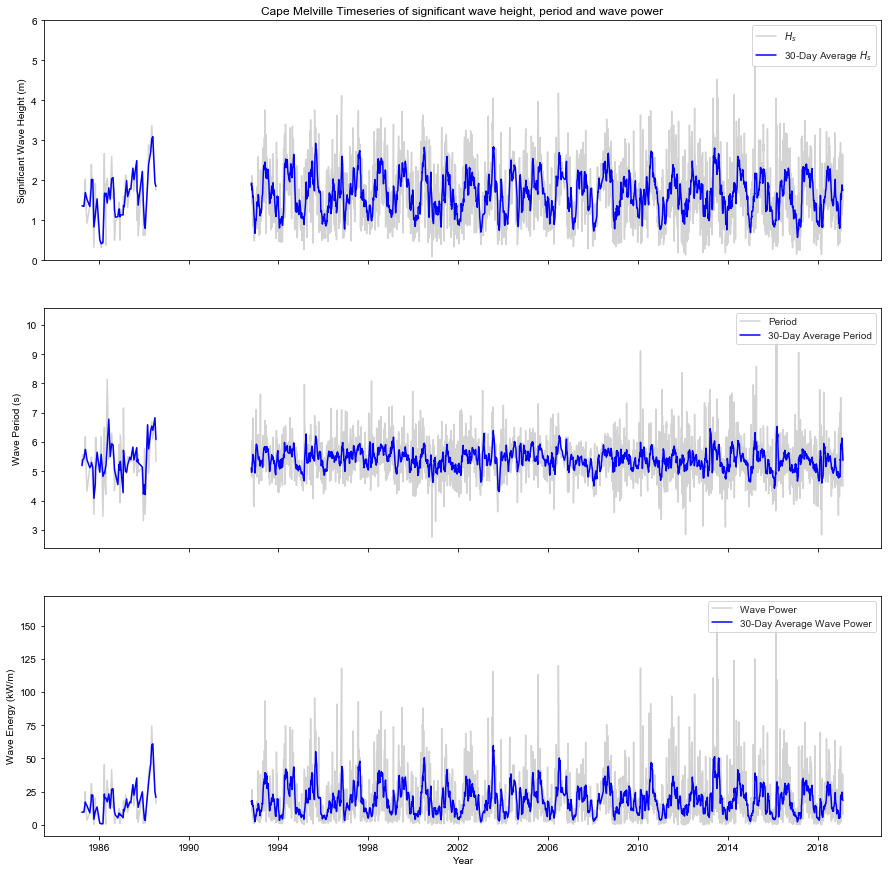

In [36]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, sharex = True,figsize = (15,15))    


sns.set_style("white")
#fig.title("Innisfail 30 Day Moving Average Significant Wave Height")


#HS
#Before date break
ax1.plot(x1,y1,color='lightgrey',label="$H_s$")
ax1.plot(x1,yy1,color='blue',label="30-Day Average $H_s$")

#After date break
ax1.plot(x2,y2,color='lightgrey', label='False')
ax1.plot(x2,yy2,color='blue')

ax1.legend(labels=["$H_s$","30-Day Average $H_s$"], loc='upper right')
ax1.set_ylabel("Significant Wave Height (m)")
ax1.set_ylim(0,6)


#Wave Period 
#Before date break
ax2.plot(x1, time1, color='lightgrey')
ax2.plot(x1,tt1,color='blue')

#After date break
ax2.plot(x2,time2, color='lightgrey')
ax2.plot(x2,tt2,color='blue')

ax2.legend(labels=['Period',"30-Day Average Period"], loc='upper right')
ax2.set_ylabel("Wave Period (s)")


#Wave Power - Need to add data
#Before date break
ax3.plot(x1, p1, color='lightgrey')
ax3.plot(x1, pp1,color='blue')

#After date break
ax3.plot(x2, p2,color='lightgrey')
ax3.plot(x2, pp2, color='blue')

ax3.legend(labels=['Wave Power',"30-Day Average Wave Power"], loc='upper right')
ax3.set_ylabel("Wave Energy (kW/m)") #Check if watts/metre is correct


#Formatting

plt.xlabel("Year")

#"years = pd.date_range(start='1985',end='2020', periods=10)
years = pd.date_range('2008','2015', freq='AS')
ax1.set_title('Cape Melville Timeseries of significant wave height, period and wave power')
plt.savefig("Melville_timeseries")

In [ ]:
for k in range(len(days)):
    if pp[k]>100:
        print pp[k], alltime[k]

## Seasonal Kendall Test

In [43]:
r = netCDF4.num2date(tt[days],u'days since 1985-01-01 00:00:00 UTC')

In [69]:
# use this to make year/month df

def getMeanH(month,year):
    valwh = []
    for k in range(len(days)):
        if r[k].year == year and r[k].month == month:
            valwh.append(wh[days[k]])

    return np.mean(valwh)


monthYear = []
for k in range(1,13):
    monthYear.append(getMeanH(k,2018))

print monthYear,
#     print alltime[k].year #,wh[days[k]]

[1.1984007883866459, 0.9760627318067806, 1.3530984021831514, 1.6465587686964136, 2.2650132958390037, 2.046110315841362, 1.9516793389341016, 1.3902886481329346, 1.852402162368185, 1.3149905854302182, 1.213292289739161, 1.1968787586025635]


In [76]:
nameCSV = 'melwh_my_no_nan_long.csv'
no_nan = pd.read_csv(str(nameCSV))
no_nan.set_index('Date')

,Wh
Date,
19931,1.368201
19932,1.383426
19933,1.267917
19934,2.253172
19935,2.444402
19936,2.018851
19937,1.839939
19938,1.603995
19939,1.841643


In [77]:
yyy = no_nan['Wh']

In [78]:
max(yyy)

2.926373648

In [79]:
import pymannkendall as mk

In [80]:
seasonal = mk.seasonal_test(no_nan, period=12)

In [81]:
seasonal

Seasonal_Mann_Kendall_Test(trend='increasing', h=True, p=0.0, z=11.63884938602403, Tau=0.31237117651908647, s=30310.0, var_s=6781458.666666667, slope=0.00762960896471471)

In [ ]:
len(seasonal)

In [ ]:
tau = 0 is no relationship, 1 is perfect relationship btn season and wh

In [ ]:
mk.seasonal_test(no_nan, alpha=0.05)

In [ ]:
mk.original_test(no_nan)

In [ ]:
mk.correlated_seasonal_test(no_nan, period=12)

In [ ]:
mk.seasonal_sens_slope(no_nan, period=12)

In [86]:
max(df.power)

164.0222161477946

## Plot month-year mean Wh from 1993, no NAN values

In [87]:
nameCSV = 'melwh_my_no_nan_plot.csv' #use this dataset to plot, has dates configured differently
mel_plot = pd.read_csv(str(nameCSV))
#mel_plot.set_index('Date')

name1CSV = 'mel_soi_wh.csv' #use this dataset to plot, has dates configured differently
soi_plot = pd.read_csv(str(name1CSV))
#soi_plot.set_index('Date')

In [102]:
soi_plot

,date,soi
0,1993,-8.2
1,1993,-7.9
2,1993,-8.5
3,1993,-21.1
4,1993,-8.2
5,1993,-16.0
6,1993,-10.8
7,1993,-14.0
8,1993,-7.6
9,1993,-13.5


In [104]:
name1CSV = 'SOI_index_long.csv' #use this dataset to plot, has dates configured differently
df = pd.read_csv(str(name1CSV))


dfaa = 'mel_soi_wh.csv'
dfaaa = pd.read_csv(str(dfaa))

In [105]:
dfaaa

,soi,wh
0,-0.9,1.368201
1,-0.7,1.383426
2,-0.5,1.267917
3,-1.2,2.253172
4,-0.3,2.444402
5,-0.8,2.018851
6,-0.8,1.839939
7,-0.9,1.603995
8,-0.7,1.841643
9,-1.1,1.569902


In [90]:
name1CSV = 'SOI_inde.csv' #use this dataset to plot, has dates configured differently
df15 = pd.read_csv(str(name1CSV), parse_dates=['date'])

In [91]:
df15

,date,soi
0,1993-01-01,-0.9
1,1993-02-01,-0.7
2,1993-03-01,-0.5
3,1993-04-01,-1.2
4,1993-05-01,-0.3
5,1993-06-01,-0.8
6,1993-07-01,-0.8
7,1993-08-01,-0.9
8,1993-09-01,-0.7
9,1993-10-01,-1.1


In [92]:
df

,date,soi
0,1993,-8.2
1,1993,-7.9
2,1993,-8.5
3,1993,-21.1
4,1993,-8.2
5,1993,-16.0
6,1993,-10.8
7,1993,-14.0
8,1993,-7.6
9,1993,-13.5


TypeError: unhashable type: 'numpy.ndarray'

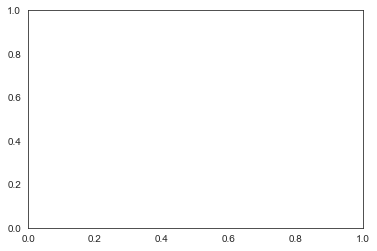

In [93]:
fig = plt.plot(mel_plot, soi_plot,figsize=(12,8))
plt.title('Monthly wave height mean Cape Melville 1993-2018')

In [ ]:
ax = mel_plot.plot()
soi_plot.plot(ax=ax)

In [94]:
x = mel_plot['Date']
y1 = mel_plot['Wh']
y2 = df['soi']

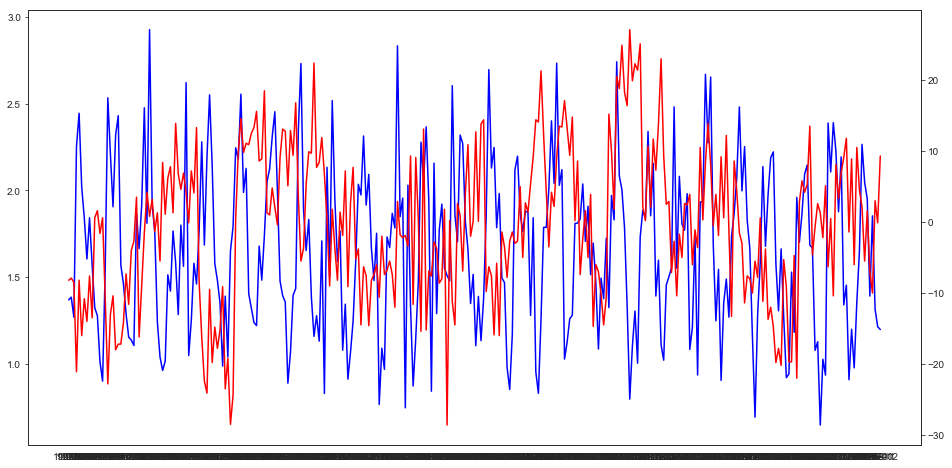

In [95]:
fig, ax1 = plt.subplots(1,1,figsize = (16,8))
ax1.plot(x, y1, color='blue')

ax2 = ax1.twinx()
ax2.plot(x, y2, color='red')

In [96]:
q = df['date']
w = df['soi']

In [97]:
slist = [-8.2,
-7.9,
-8.5,
-21.1,
-8.2,
-16,
-10.8,
-14,
-7.6,
-13.5,
0.6,
1.6,
-1.6,
0.6,
-10.6,
-22.8,
-13,
-10.4,
-18,
-17.2,
-17.2,
-14.1,
-7.3,
-11.6,
-4,
-2.7,
3.5,
-16.2,
-9,
-1.5,
4.2,
0.8,
3.2,
-1.3,
1.3,
-5.5,
8.4,
1.1,
6.2,
7.8,
1.3,
13.9,
6.8,
4.6,
6.9,
4.2,
-0.1,
7.2,
4.1,
13.3,
-8.5,
-16.2,
-22.4,
-24.1,
-9.5,
-19.8,
-14.8,
-17.8,
-15.2,
-9.1,
-23.5,
-19.2,
-28.5,
-24.4,
0.5,
9.9,
14.6,
9.8,
11.1,
10.9,
12.5,
13.3,
15.6,
8.6,
8.9,
18.5,
1.3,
1,
4.8,
2.1,
-0.4,
9.1,
13.1,
12.8,
5.1,
12.9,
9.4,
16.8,
3.6,
-5.5,
-3.7,
5.3,
9.9,
9.7,
22.4,
7.7,
8.4,
11.9,
6.7,
0.3,
-9,
1.8,
-3.7,
-8.2,
1.4,
-1.9,
7.2,
-9.1,
2.7,
7.7,
-5.2,
-3.8,
-14.5,
-6.3,
-7.6,
-14.6,
-8.2,
-7.4,
-6,
-10.6,
-2,
-7.4,
-6.8,
-5.5,
-7.4,
-12,
2.9,
-1.8,
-2.2,
-1.9,
-3.4,
9.3,
-11.6,
9.1,
0.2,
-15.4,
13.1,
-15.2,
-6.9,
-7.6,
-2.8,
-3.7,
-8.6,
-8,
1.8,
-28.6,
0.2,
-11.2,
-14.5,
2.6,
0.9,
-6.9,
3.9,
10.9,
-2,
0.1,
12.7,
0.1,
13.8,
14.4,
-9.8,
-6.3,
-7.6,
-15.9,
-5.8,
-16,
-1.4,
-3.5,
-7.8,
-2.7,
-1.4,
-3,
-2.7,
5,
-5,
2.7,
1.4,
5.4,
9.2,
14.4,
14.1,
21.3,
12.2,
4.5,
-3.5,
4.2,
2.2,
9.1,
13.5,
13.4,
17.1,
13.3,
9.4,
14.8,
0.2,
8.6,
-7.4,
-2.3,
1.6,
-5,
3.9,
-14.7,
-6,
-7,
-10.1,
-14.5,
-10.6,
15.2,
10,
1.8,
20.5,
18.8,
24.9,
18.3,
16.4,
27.1,
19.9,
22.3,
21.4,
25.1,
2.1,
0.2,
10.7,
2.1,
11.7,
7.3,
13.8,
23,
9.4,
2.5,
2.9,
-7.1,
-2.7,
-10.4,
-1.7,
-5,
2.6,
2.4,
3.9,
-6,
-1.1,
-3.6,
10.5,
0.3,
8.4,
13.9,
8.1,
-0.5,
3.9,
-1.9,
9.2,
0.6,
12.2,
-1.3,
-13.3,
8.6,
4.4,
-1.5,
-3,
-11.4,
-7.6,
-8,
-10,
-5.5,
-7.8,
0.6,
-11.2,
-3.8,
-13.7,
-12,
-14.7,
-19.8,
-17.8,
-20.2,
-5.3,
-9.1,
-19.7,
-19.7,
-4.7,
-22,
2.8,
5.8,
4.2,
5.3,
13.5,
-4.6,
-0.7,
2.6,
1.3,
-2.2,
5.1,
-6.3,
0.5,
-10.4,
8.1,
3.3,
6.9,
9.1,
11.8,
-1.4,
8.9,
-6,
10.5,
4.5,
2.1,
-5.5,
1.6,
-6.9,
-10,
3,
-0.1,
9.3]

yearss = [
1993,
1993,
1993,
1993,
1993,
1993,
1993,
1993,
1993,
1993,
1993,
1993,
1994,
1994,
1994,
1994,
1994,
1994,
1994,
1994,
1994,
1994,
1994,
1994,
1995,
1995,
1995,
1995,
1995,
1995,
1995,
1995,
1995,
1995,
1995,
1995,
1996,
1996,
1996,
1996,
1996,
1996,
1996,
1996,
1996,
1996,
1996,
1996,
1997,
1997,
1997,
1997,
1997,
1997,
1997,
1997,
1997,
1997,
1997,
1997,
1998,
1998,
1998,
1998,
1998,
1998,
1998,
1998,
1998,
1998,
1998,
1998,
1999,
1999,
1999,
1999,
1999,
1999,
1999,
1999,
1999,
1999,
1999,
1999,
2000,
2000,
2000,
2000,
2000,
2000,
2000,
2000,
2000,
2000,
2000,
2000,
2001,
2001,
2001,
2001,
2001,
2001,
2001,
2001,
2001,
2001,
2001,
2001,
2002,
2002,
2002,
2002,
2002,
2002,
2002,
2002,
2002,
2002,
2002,
2002,
2003,
2003,
2003,
2003,
2003,
2003,
2003,
2003,
2003,
2003,
2003,
2003,
2004,
2004,
2004,
2004,
2004,
2004,
2004,
2004,
2004,
2004,
2004,
2004,
2005,
2005,
2005,
2005,
2005,
2005,
2005,
2005,
2005,
2005,
2005,
2005,
2006,
2006,
2006,
2006,
2006,
2006,
2006,
2006,
2006,
2006,
2006,
2006,
2007,
2007,
2007,
2007,
2007,
2007,
2007,
2007,
2007,
2007,
2007,
2007,
2008,
2008,
2008,
2008,
2008,
2008,
2008,
2008,
2008,
2008,
2008,
2008,
2009,
2009,
2009,
2009,
2009,
2009,
2009,
2009,
2009,
2009,
2009,
2009,
2010,
2010,
2010,
2010,
2010,
2010,
2010,
2010,
2010,
2010,
2010,
2010,
2011,
2011,
2011,
2011,
2011,
2011,
2011,
2011,
2011,
2011,
2011,
2011,
2012,
2012,
2012,
2012,
2012,
2012,
2012,
2012,
2012,
2012,
2012,
2012,
2013,
2013,
2013,
2013,
2013,
2013,
2013,
2013,
2013,
2013,
2013,
2013,
2014,
2014,
2014,
2014,
2014,
2014,
2014,
2014,
2014,
2014,
2014,
2014,
2015,
2015,
2015,
2015,
2015,
2015,
2015,
2015,
2015,
2015,
2015,
2015,
2016,
2016,
2016,
2016,
2016,
2016,
2016,
2016,
2016,
2016,
2016,
2016,
2017,
2017,
2017,
2017,
2017,
2017,
2017,
2017,
2017,
2017,
2017,
2017,
2018,
2018,
2018,
2018,
2018,
2018,
2018,
2018,
2018,
2018,
2018,
2018]

In [98]:
xxx = df15['date']
y1 = mel_plot['Wh']

In [99]:
print len(y1)
print len(slist)

312
312


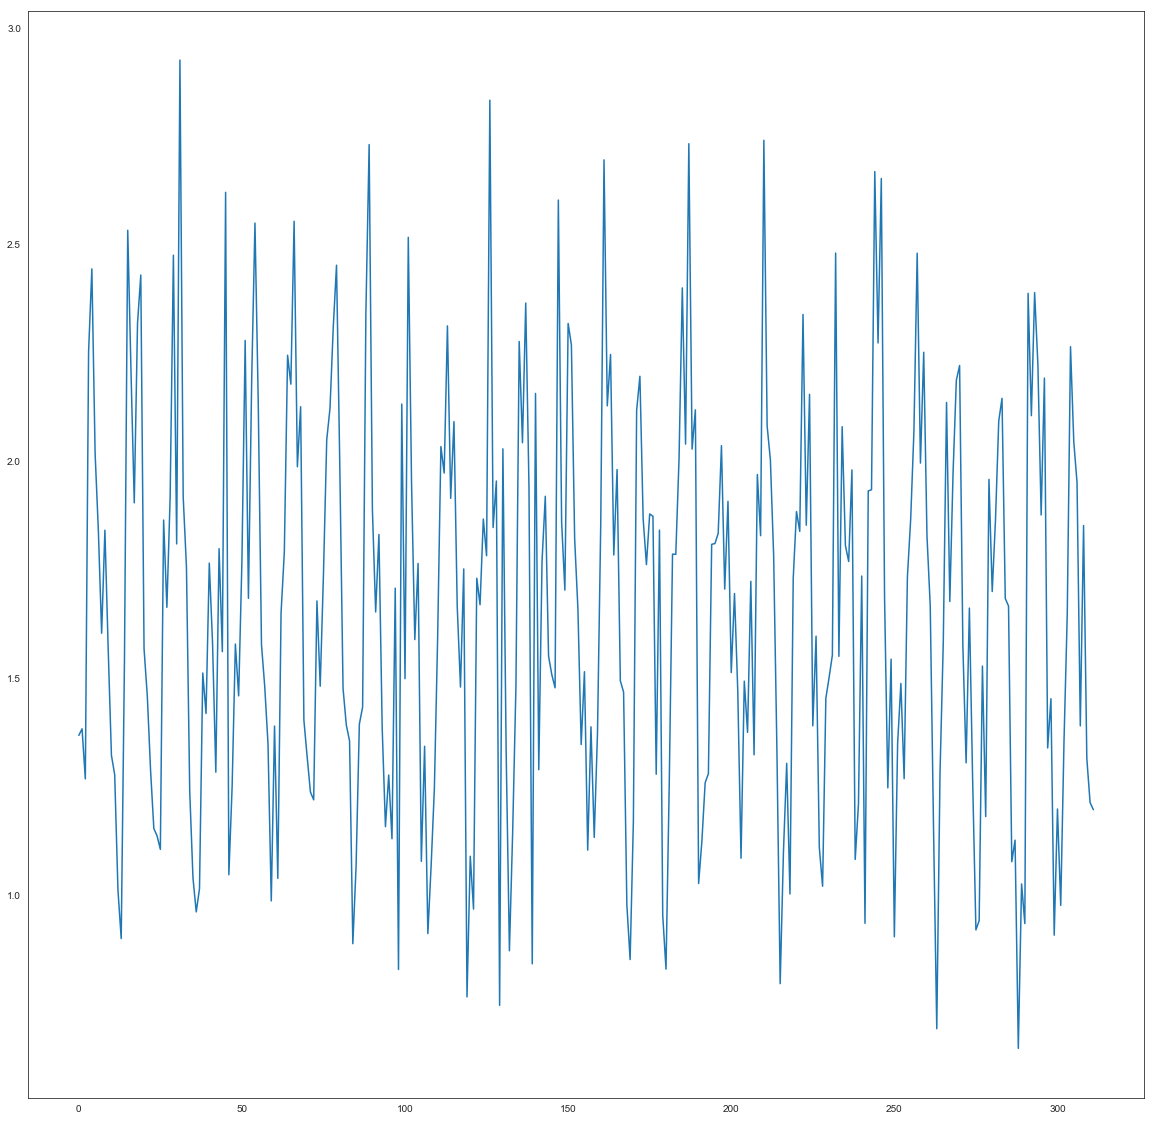

In [100]:
fig, ax1 = plt.subplots(1,1, figsize=(20,20))
ax1.plot(y1)

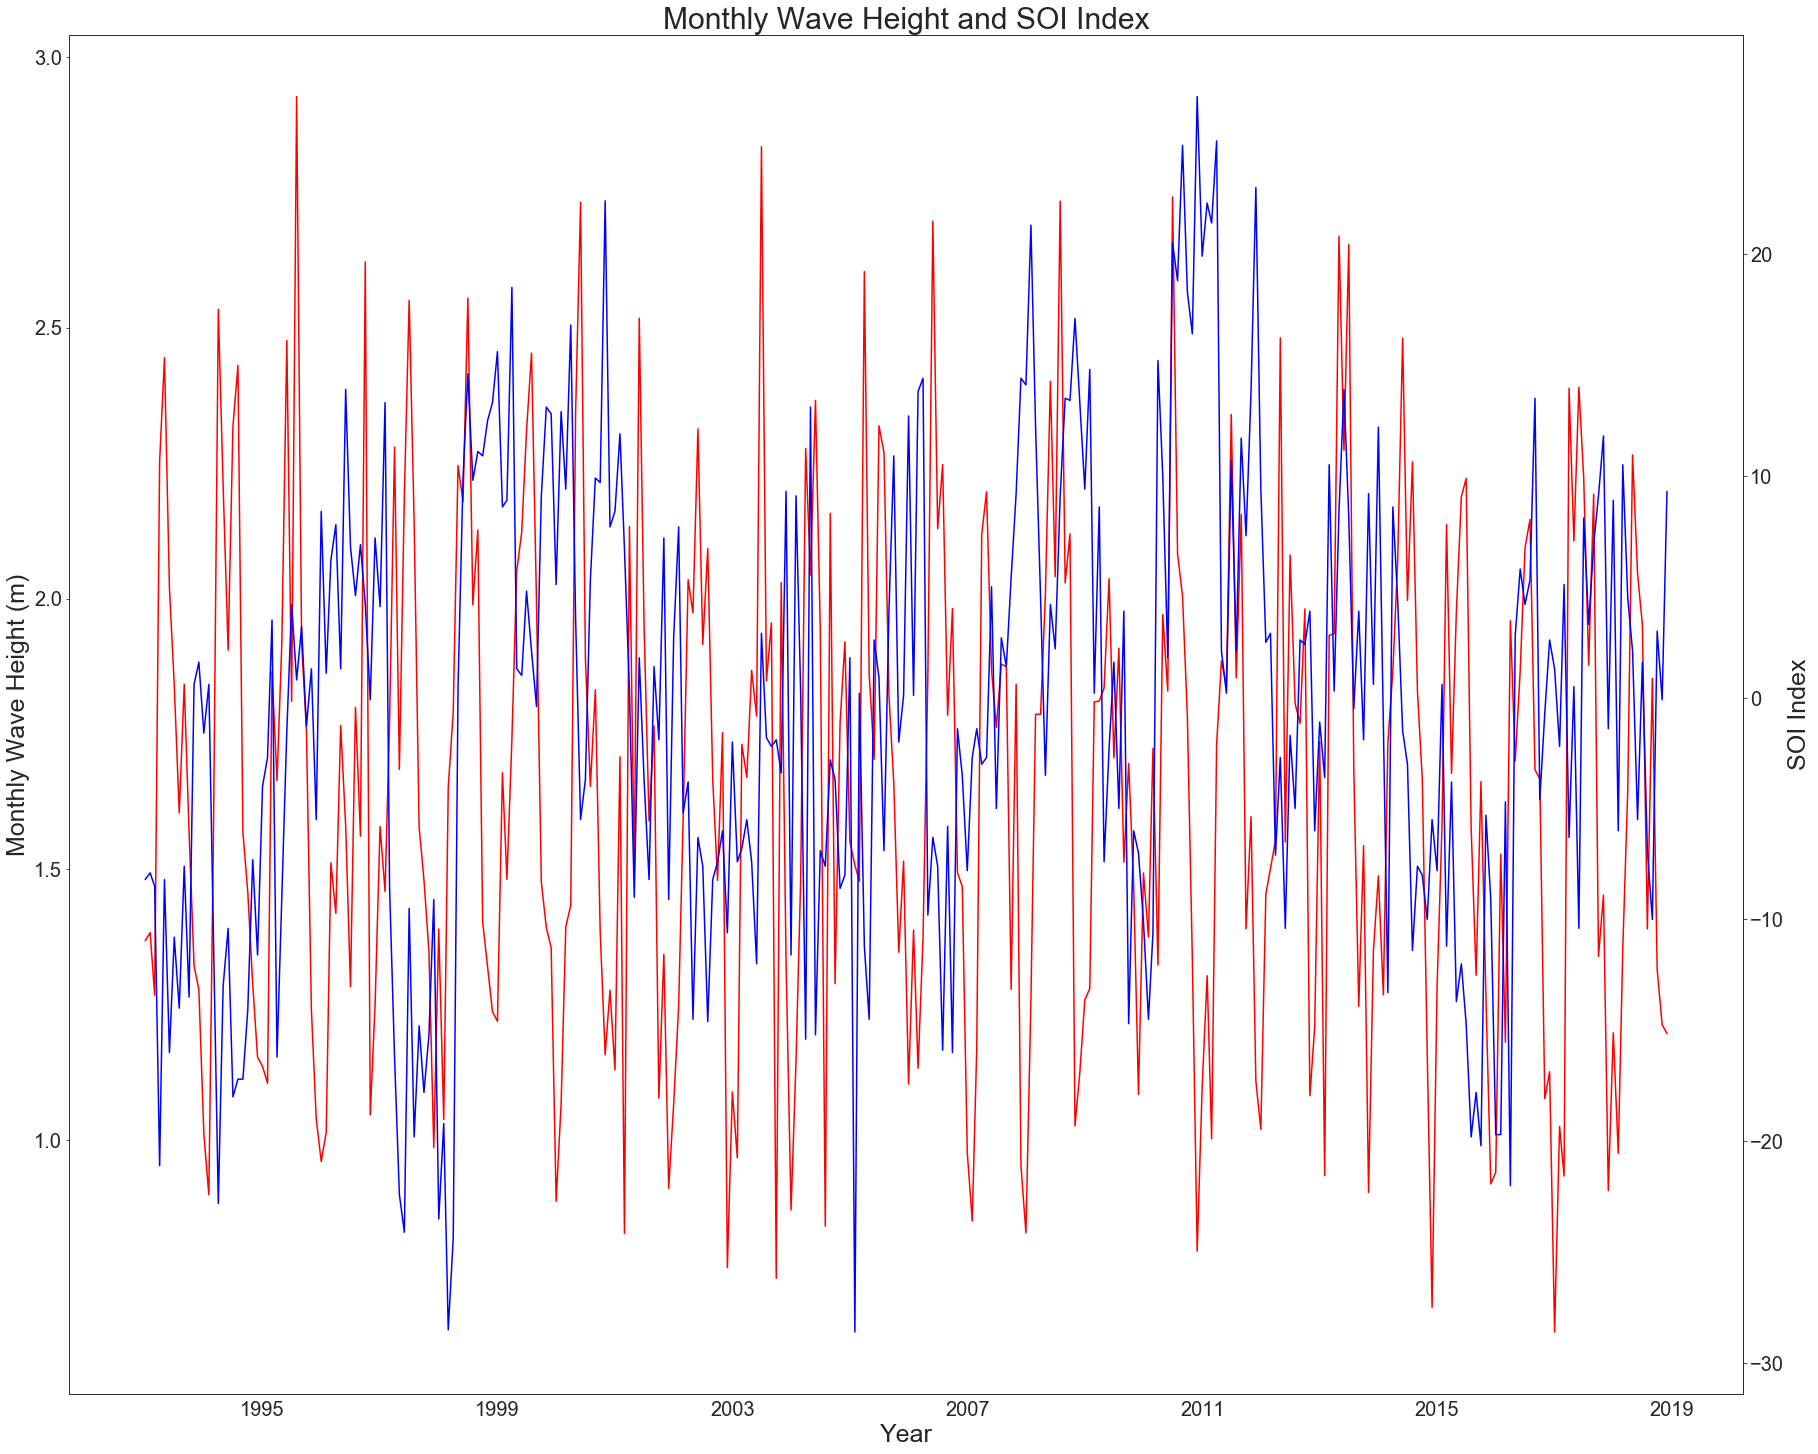

In [101]:
fig, ax1 = plt.subplots(1,1, figsize=(30,25))

#ax1.plot(xxx,y1, color='blue') #monthly mean wh

#ax2=ax1.twinx()
ax1.plot(xxx,y1, color='red')
ax1.set_ylabel('Monthly Wave Height (m)', fontsize = 25)

ax2 = ax1.twinx()
ax2.plot(xxx,slist, color='blue')
ax2.set_ylabel('SOI Index',fontsize = 25)
#ax2.set_yticklabels( rotation=90, fontsize=50)

#ax.tick_params(axis='both', which='major', labelsize=10)
#ax.tick_params(axis='both', which='minor', labelsize=8)

ax2.yaxis.set_tick_params(labelsize=20)
ax1.yaxis.set_tick_params(labelsize=20)
ax1.xaxis.set_tick_params(labelsize=20)

ax1.set_xlabel('Year',fontsize = 25)
ax2.set_title('Monthly Wave Height and SOI Index', fontsize=30)

plt.savefig('monthly wh vs soi melville')

In [ ]:
fig, ax1 = plt.subplots(1,1, figsize=(20,20))
ax2=ax1.twinx()

ax1.plot(xxx,y1, color='b') #monthly mean wh
ax1.set_xlabel('Year')
ax1.set_ylabel('Monthly wave height (m)')


ax2.plot(slist, color='r')#monthly soi value
ax2.set_ylabel('SOI Index')

ax2.autoscale()


In [ ]:
df2 = df.astype(float)

In [ ]:
lines = soi_plot.plot.line(q,w)

In [ ]:
print result.slope

In [ ]:
len(result)

In [ ]:
wh

In [ ]:
1993-1
1993-2
1993-3
1993-4
1993-5
1993-6
1993-7
1993-8
1993-9
1993-10
1993-11
1993-12
1994-1
1994-2
1994-3
1994-4
1994-5
1994-6
1994-7
1994-8
1994-9
1994-10
1994-11
1994-12
1995-1
1995-2
1995-3
1995-4
1995-5
1995-6
1995-7
1995-8
1995-9
1995-10
1995-11
1995-12
1996-1
1996-2
1996-3
1996-4
1996-5
1996-6
1996-7
1996-8
1996-9
1996-10
1996-11
1996-12
1997-1
1997-2
1997-3
1997-4
1997-5
1997-6
1997-7
1997-8
1997-9
1997-10
1997-11
1997-12
1998-1
1998-2
1998-3
1998-4
1998-5
1998-6
1998-7
1998-8
1998-9
1998-10
1998-11
1998-12
1999-1
1999-2
1999-3
1999-4
1999-5
1999-6
1999-7
1999-8
1999-9
1999-10
1999-11
1999-12
2000-1
2000-2
2000-3
2000-4
2000-5
2000-6
2000-7
2000-8
2000-9
2000-10
2000-11
2000-12
2001-1
2001-2
2001-3
2001-4
2001-5
2001-6
2001-7
2001-8
2001-9
2001-10
2001-11
2001-12
2002-1
2002-2
2002-3
2002-4
2002-5
2002-6
2002-7
2002-8
2002-9
2002-10
2002-11
2002-12
2003-1
2003-2
2003-3
2003-4
2003-5
2003-6
2003-7
2003-8
2003-9
2003-10
2003-11
2003-12
2004-1
2004-2
2004-3
2004-4
2004-5
2004-6
2004-7
2004-8
2004-9
2004-10
2004-11
2004-12
2005-1
2005-2
2005-3
2005-4
2005-5
2005-6
2005-7
2005-8
2005-9
2005-10
2005-11
2005-12
2006-1
2006-2
2006-3
2006-4
2006-5
2006-6
2006-7
2006-8
2006-9
2006-10
2006-11
2006-12
2007-1
2007-2
2007-3
2007-4
2007-5
2007-6
2007-7
2007-8
2007-9
2007-10
2007-11
2007-12
2008-1
2008-2
2008-3
2008-4
2008-5
2008-6
2008-7
2008-8
2008-9
2008-10
2008-11
2008-12
2009-1
2009-2
2009-3
2009-4
2009-5
2009-6
2009-7
2009-8
2009-9
2009-10
2009-11
2009-12
2010-1
2010-2
2010-3
2010-4
2010-5
2010-6
2010-7
2010-8
2010-9
2010-10
2010-11
2010-12
2011-1
2011-2
2011-3
2011-4
2011-5
2011-6
2011-7
2011-8
2011-9
2011-10
2011-11
2011-12
2012-1
2012-2
2012-3
2012-4
2012-5
2012-6
2012-7
2012-8
2012-9
2012-10
2012-11
2012-12
2013-1
2013-2
2013-3
2013-4
2013-5
2013-6
2013-7
2013-8
2013-9
2013-10
2013-11
2013-12
2014-1
2014-2
2014-3
2014-4
2014-5
2014-6
2014-7
2014-8
2014-9
2014-10
2014-11
2014-12
2015-1
2015-2
2015-3
2015-4
2015-5
2015-6
2015-7
2015-8
2015-9
2015-10
2015-11
2015-12
2016-1
2016-2
2016-3
2016-4
2016-5
2016-6
2016-7
2016-8
2016-9
2016-10
2016-11
2016-12
2017-1
2017-2
2017-3
2017-4
2017-5
2017-6
2017-7
2017-8
2017-9
2017-10
2017-11
2017-12
2018-1
2018-2
2018-3
2018-4
2018-5
2018-6
2018-7
2018-8
2018-9
2018-10
2018-11
2018-12